In [21]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

In [22]:
year = 2021
locate = "강남구"


def population(year, locate):
    df = pd.read_csv(r"./data/주민등록인구_20230710130833.csv", header=0, index_col="동별(2)")
    df.drop(columns="동별(1)", inplace=True)
    df.drop(index="동별(2)", inplace=True)
    df.drop(index="소계", inplace=True)
    return df[str(year)][str(locate)]


def parkinglot(year, locate):
    df = pd.read_csv(
        r"./data/주택가+주차장_20230710095648.csv", header=0, index_col="자치구별(2)"
    )
    df.drop(columns="자치구별(1)", inplace=True)
    return df[str(year) + ".5"][locate]


def house_price(year, locate):
    df = pd.read_csv(r"data/주택가격지수(매매)_20230710095430.csv", header=0)
    tmp = df.loc[df["시점"] == year].loc[df["자치구별(2)"] == locate, "종합"].values
    return float(tmp)


def fire_count(year, locate):
    df = pd.read_csv(r"data/화재발생+현황_20230710145224.csv", index_col="동별(2)")
    df.drop(columns="동별(1)", inplace=True)
    tmp = df[str(year)][str(locate)]
    return tmp


def fire_price(year, locate):
    df = pd.read_csv(r"data/화재발생+현황_20230710145224.csv", index_col="동별(2)")
    df.drop(columns="동별(1)", inplace=True)
    tmp = df[str(year) + ".1"][str(locate)]
    return tmp


tmp = fire_price(year, locate)
tmp

'1354949'

In [23]:
def business(year,locate,KindOfbusiness,KindOfData):
    df=pd.read_csv(r'data/사업체현황(산업대분류별_동별)(2017년+이후)_20230710103735.csv',header=None)

    # df=df.loc[df[4]="소계"]
    df.iloc[0][1]='년도'
    df.iloc[1][1]='합계'
    df.iloc[2][1]='업종'
    df.iloc[3][1]='통계종류'

    df=df.T
    df.drop(columns=[1,5],inplace=True)

    row = df.iloc[1]  # Select the row to use as column names
    df = df[2:]  # Remove the row from the DataFrame
    df = df.set_axis(row, axis='columns')  # Set the row as column names
    # tmp=df.head(20)
    tmp=(int(df.loc[df['년도']==str(year)].loc[df['업종']==KindOfbusiness].loc[df['동별(2)']=='소계'].loc[df['통계종류']==KindOfData,locate].values))
    return tmp

def business_ratio(year,locate,KindOfbusiness,KindOfData):
    return business(year,locate,KindOfbusiness,KindOfData)/business(year,locate,'소계',KindOfData)*100
    
(business_ratio(2021,'강남구','제조업','사업체수'))
# business(2017,'강남구','제조업','사업체수')

2.75164307725872

In [24]:
def metro(year,locate):
    import pandas as pd
    import csv

    # 추출할 역명 리스트
    # 추출할 인덱스 리스트
    station_list = [
        "압구정",
        "압구정로데오",
        "신사",
        "논현",
        "신논현",
        "강남",
        "양재",
        "매봉",
        "한티",
        "선릉",
        "학동",
        "언주",
        "매봉",
        "대치",
        "도곡",
        "개포동",
        "대청",
        "일원",
        "수서",
        "봉은사",
        "청담",
    ]
    station_list2 = ["온수", "개봉", "구로", "신도림"]
    input_file = "data/CARD_SUBWAY_MONTH_%d.csv" % year
    output_file = "data/CARD_SUBWAY_MONTH_%d_fixed.csv" % year

    print(input_file)
    with open(input_file, "r", encoding="euc-kr") as f_in, open(
        output_file, "w", newline="", encoding="euc-kr"
    ) as f_out:
        reader = csv.reader(f_in)
        writer = csv.writer(f_out)

        for row in reader:
            if len(row) > 7:
                # Split the row into two rows
                row1 = row[:7]
                row2 = row[7:]
                writer.writerow(row1)
                writer.writerow(row2)
            else:
                writer.writerow(row)
        # 데이터 불러오기
    subway = pd.read_csv(
        output_file, encoding="euc-kr", index_col=False
    )
    subway_df = subway.drop("등록일자", axis=1)
    subway_df.set_index("역명", inplace=True)
    subway_df = subway_df.drop("사용일자", axis=1)
    subway_sum = subway_df.groupby("역명").sum()

    # 역명을 포함한 열 추출
    filtered_data1 = subway_sum[subway_sum.index.isin(station_list)]

    # 필요한 열만 선택  
    extracted_data1 = filtered_data1[["승차총승객수", "하차총승객수"]]  
    # 역명을 포함한 열 추출
    filtered_data2 = subway_sum[subway_sum.index.isin(station_list2)]

    # 필요한 열만 선택
    extracted_data2 = filtered_data2[["승차총승객수", "하차총승객수"]]
    filtered_data1["지역구"] = "강남"

    # 필요한 열만 선택
    if locate=='강남구':
        extracted_data1 = filtered_data1[["지역구", "승차총승객수", "하차총승객수"]]
        extracted_data1.set_index("지역구",inplace=True)
        extracted_data_df1 = extracted_data1.groupby("지역구").sum()
        tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))
        return tmp

    if locate=='구로구':
        filtered_data2["지역구"] = "구로"
        # 필요한 열만 선택
        extracted_data2 = filtered_data2[["지역구", "승차총승객수", "하차총승객수"]]
        extracted_data2.set_index("지역구", inplace=True)
        extracted_data_df2 = extracted_data2.groupby("지역구").sum()
        tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))
        return tmp


In [25]:
#calc gap
pop_gap=[]
business_gap=[]
jobs_gap=[]
house_gap=[]
parkinglot_gap=[]
fire_count_gap=[]
fire_price_gap=[]
metro_gap=[]

yeardata = []

for year in range(2017, 2022):
    yeardata.append(year)
    pop_gap.append((int(population(year, '강남구')))-(int(population(year, '구로구'))))
    business_gap.append((int(business(year,'강남구','소계','사업체수')))-(int(business(year,'구로구','소계','사업체수'))))
    jobs_gap.append((int(business(year,'강남구','소계','종사자수')))-(int(business(year,'구로구','소계','종사자수'))))
    house_gap.append((float(house_price(year,'강남구')))-(float(house_price(year,'구로구'))))
    parkinglot_gap.append(float(parkinglot(year,'강남구'))-float(parkinglot(year,'구로구')))
    fire_count_gap.append(int(fire_count(year,'강남구'))-int(fire_count(year,'구로구')))
    fire_price_gap.append(int(fire_price(year,'강남구'))-int(fire_price(year,'구로구')))
    metro_gap.append(metro(year,'강남구')-metro(year,'구로구'))

data = {'year': ['17-16','18-17','19-18','20-19','21-20'],
        'pop_gap': pop_gap,
        'business_gap': business_gap,
        'jobs_gap': jobs_gap,
        'house_gap': house_gap,
        'parkinglot_gap': parkinglot_gap,
        'fire_count_gap': fire_count_gap,
        'fire_price_gap': fire_price_gap,
        'metro_gap': metro_gap}

gap_df = pd.DataFrame(data)

gap_df.set_index('year', inplace=True)

tmp = gap_df.copy()
year_gap_df = gap_df.diff()

print((year_gap_df.dropna() / tmp * 100).round(2))

year_gap_df=((year_gap_df.dropna() / tmp * 100).round(2)).dropna()

year_gap_df

data/CARD_SUBWAY_MONTH_2017.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2017.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_7106/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2018.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2018.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_7106/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2019.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2019.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_7106/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2020.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2020.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_7106/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2021.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2021.csv
       pop_gap  business_gap  jobs_gap  house_gap  parkinglot_gap  \
year                                                                
17-16      NaN           NaN       NaN        NaN             NaN   
18-17    -9.66         -3.92      2.20      73.17           16.28   
19-18     1.69         -1.70     -0.61      16.33           25.86   
20-19     0.65         47.53     21.04    -172.22           30.12   
21-20     4.35         -7.50     -6.87      10.00            5.68   

       fire_count_gap  fire_price_gap  metro_gap  
year                                              
17-16             NaN             NaN        NaN  
18-17          -39.88           20.28       2.51  
19-18           17.22           -9.46       4.14  
20-19            9.52          -20.19     -29.29  
21-20           -5.96          356.48       0.74  


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_7106/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


,pop_gap,business_gap,jobs_gap,house_gap,parkinglot_gap,fire_count_gap,fire_price_gap,metro_gap
year,,,,,,,,
18-17,-9.66,-3.92,2.20,73.17,16.28,-39.88,20.28,2.51
19-18,1.69,-1.70,-0.61,16.33,25.86,17.22,-9.46,4.14
20-19,0.65,47.53,21.04,-172.22,30.12,9.52,-20.19,-29.29
21-20,4.35,-7.50,-6.87,10.00,5.68,-5.96,356.48,0.74


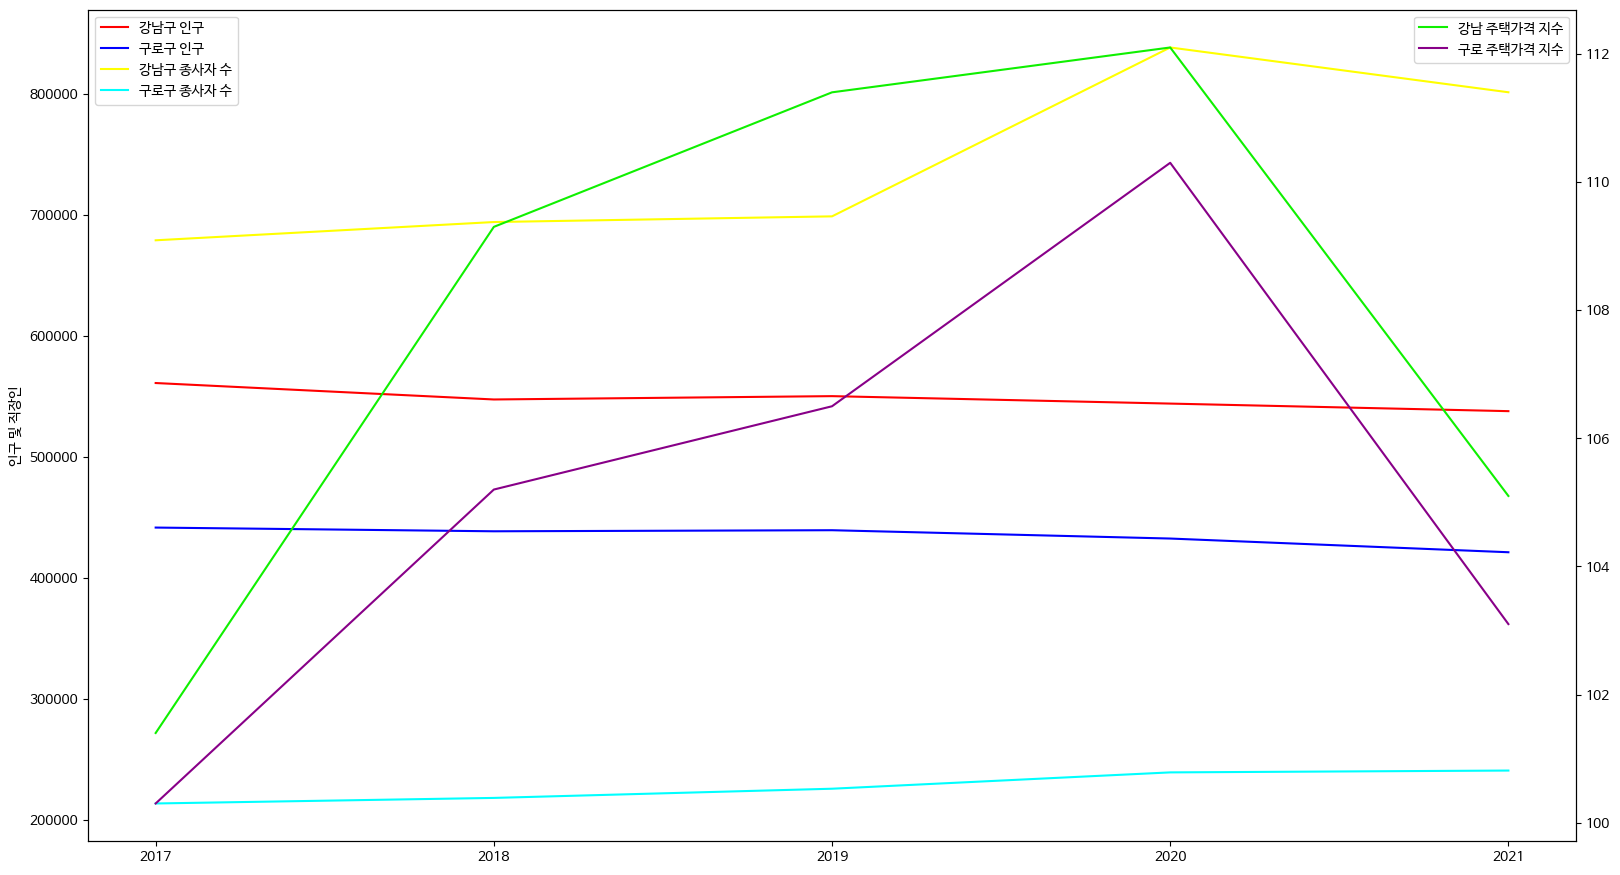

In [26]:
gangnampop = []
guro_pop = []
gangnam_business=[]
guro_business=[]
gangnam_jobs=[]
guro_jobs=[]
gangnam_house=[]
guro_house=[]
dpi = 100
width = 1920 / dpi
height = 1080 / dpi

for year in range(2017, 2022):
    gangnampop.append(int(population(year, '강남구')))
    guro_pop.append(int(population(year, '구로구')))
    gangnam_business.append(int(business(year,'강남구','소계','사업체수')))
    guro_business.append(int(business(year,'구로구','소계','사업체수')))
    gangnam_jobs.append(int(business(year,'강남구','소계','종사자수')))
    guro_jobs.append(int(business(year,'구로구','소계','종사자수')))
    gangnam_house.append(float(house_price(year,'강남구')))
    guro_house.append(float(house_price(year,'구로구')))

fig, ax1 = plt.subplots(figsize=(width, height), dpi=dpi)

ax2 = ax1.twinx()

ax1.plot(yeardata, gangnampop, label='강남구 인구', color='#FF0000')
ax1.plot(yeardata, guro_pop, label='구로구 인구', color='#0000FF')

ax1.plot(yeardata, gangnam_jobs, label='강남구 종사자 수', color='#FFFF00')
ax1.plot(yeardata, guro_jobs, label='구로구 종사자 수', color='#00FFFF')

ax2.plot(yeardata, gangnam_house, label='강남 주택가격 지수',color='#0FF000')
ax2.plot(yeardata, guro_house, label='구로 주택가격 지수',color='#880088')

ax2.legend(loc='best')

ax1.set_ylabel('인구 및 직장인')
# ax2.set_ylabel('직장 수')

ax1.legend(loc='best',)

plt.xticks(range(min(yeardata), max(yeardata)+1, 1))

fig.savefig('graph/pop_and_jobs_with_houseprice.png',bbox_inches='tight')
# plt.show()






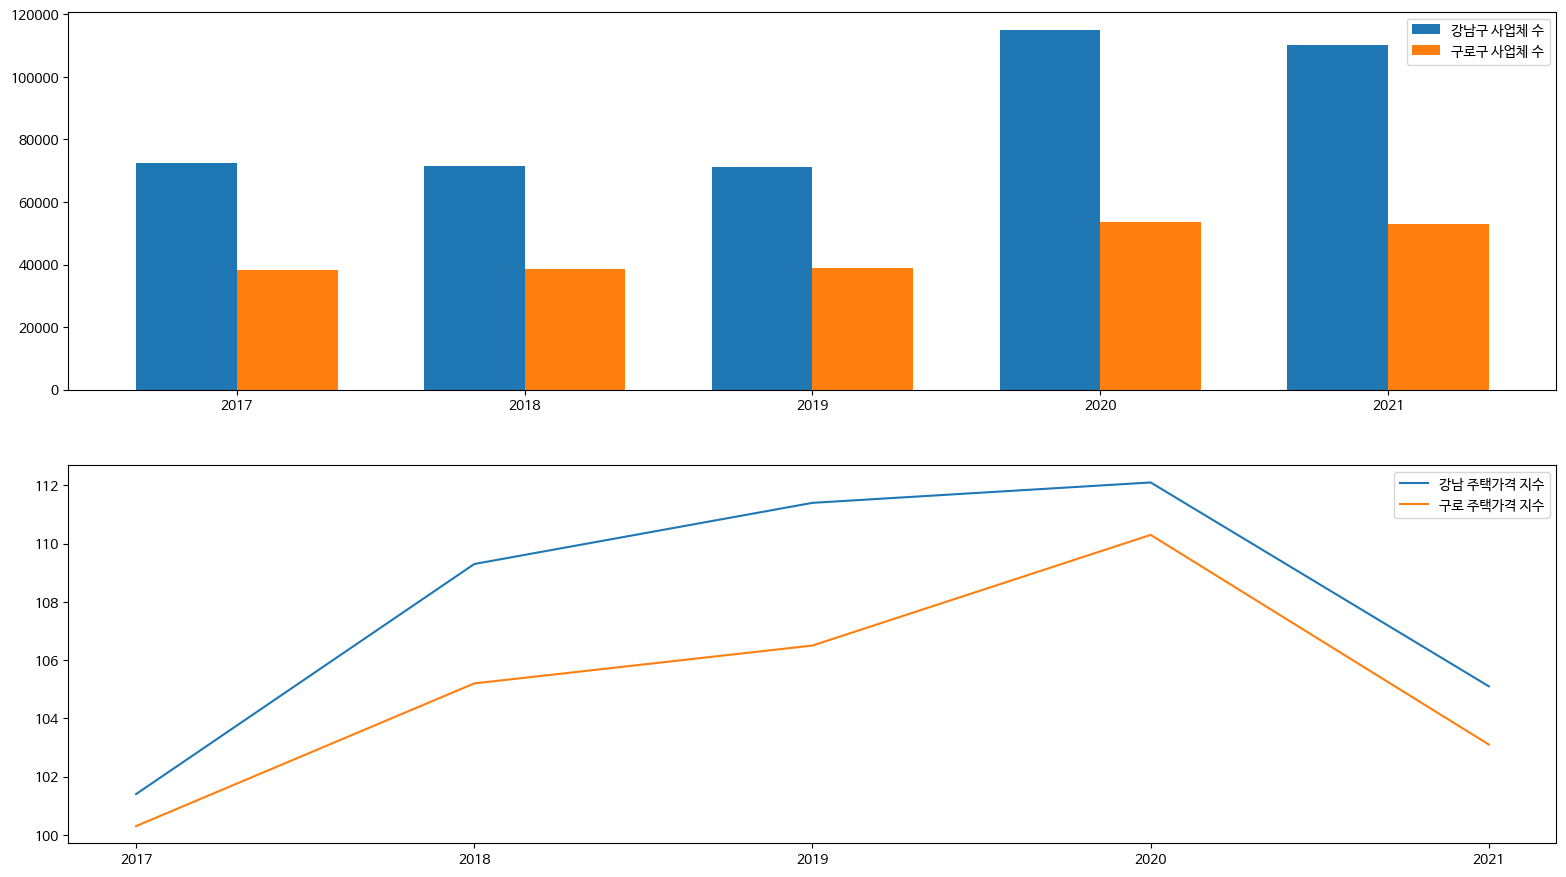

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False,figsize=(width, height), dpi=dpi)

bar_width = 0.35
x_pos = np.arange(len(yeardata))

ax1.bar(x_pos - bar_width/2, gangnam_business, bar_width, label='강남구 사업체 수')
ax1.bar(x_pos + bar_width/2, guro_business, bar_width, label='구로구 사업체 수')
ax2.plot(yeardata, gangnam_house, label='강남 주택가격 지수')
ax2.plot(yeardata, guro_house, label='구로 주택가격 지수')

ax1.set_xticks(x_pos)
ax2.set_xticks(range(min(yeardata), max(yeardata)+1, 1))
ax1.set_xticklabels(yeardata)
ax1.legend(loc='best')
ax2.legend(loc='best')
fig.savefig('graph/business_and_housePrice.png',bbox_inches='tight')
plt.show()



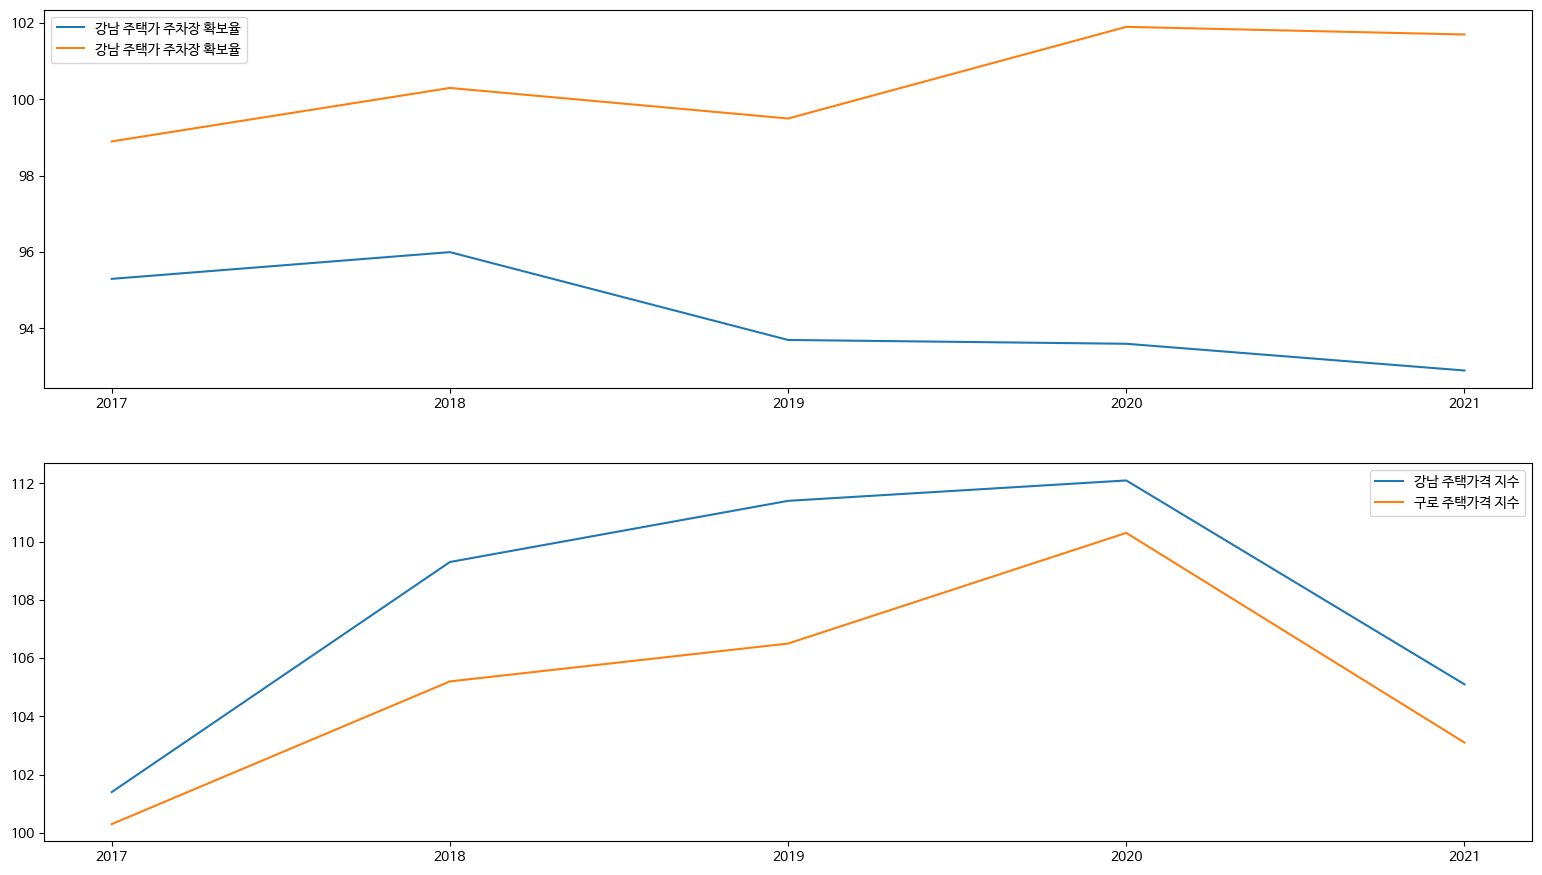

In [28]:
poppark_gangnam=[]
poppark_guro=[]
for year in range(2017,2022,1):
    poppark_gangnam.append(float(parkinglot(year,'강남구')))
    poppark_guro.append(float(parkinglot(year,'구로구'))) 

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False,figsize=(width, height), dpi=dpi)


ax1.plot(yeardata,poppark_gangnam,label='강남 주택가 주차장 확보율')
ax1.plot(yeardata,poppark_guro,label='강남 주택가 주차장 확보율')
ax2.plot(yeardata, gangnam_house, label='강남 주택가격 지수')
ax2.plot(yeardata, guro_house, label='구로 주택가격 지수')

ax1.set_xticks(range(min(yeardata), max(yeardata)+1, 1))
ax2.set_xticks(range(min(yeardata), max(yeardata)+1, 1))

ax1.legend(loc='best')
ax2.legend(loc='best')
fig.savefig('graph/parkinglot_and_housePrice.png',bbox_inches='tight')
plt.show()

상관 계수: -0.1834700959670848
p-value: 0.3800135160882236


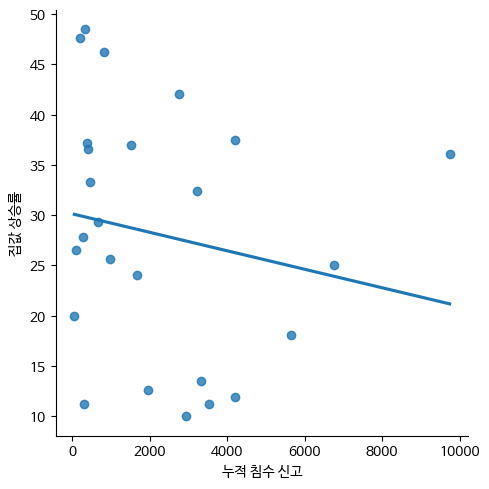

In [29]:
data = pd.read_excel('data/(2006_2022)순위_서울시 466개 법정동 주택침수건수.xlsx')
data.head()

#필요없는 칼럼 지우기
data = data.drop(['순위', 'Unnamed: 4', 'Unnamed: 5'], axis=1)
data['시군구'].unique()


def house_price_all(locate):
    df=pd.read_csv('data/주택가격지수(매매)_20230710095430.csv',header=0)
    tmp=df.loc[df['시점'] == 2022].loc[df['자치구별(2)']==locate,'종합'].values
    tmp_1=df.loc[df['시점'] == 2006].loc[df['자치구별(2)']==locate,'종합'].values
    growth = (int(tmp) - int(tmp_1)) / int(tmp_1) * 100
    return float(growth)


def flooding(locate):
    data = pd.read_excel('data/(2006_2022)순위_서울시 466개 법정동 주택침수건수.xlsx')
    data = data.drop(['순위', 'Unnamed: 4', 'Unnamed: 5'], axis=1)
    locate1 = locate
    data=data[data['시군구']==locate1]
    sum_data=data['침수주택 건수(건)'].sum()
    return sum_data
                   
gu=['관악구', '영등포구', '동작구', '양천구', '강서구', '서초구', '구로구', '금천구', '강남구',
       '강동구', '광진구', '은평구', '송파구', '강북구', '서대문구', '마포구', '중랑구', '도봉구',
       '성북구', '동대문구', '노원구', '성동구', '용산구', '중구', '종로구']

data1=[]
for i in gu:
    data1.append([house_price_all(i), flooding(i)])
   

columns = ['집값 상승률', '누적 침수 신고']
index = gu
df=pd.DataFrame(data1, index = index, columns= columns)

g=sns.lmplot(x='누적 침수 신고', y='집값 상승률', data=df, ci=None)

from sklearn.linear_model import LinearRegression
from scipy import stats

corr, p_value = stats.pearsonr(df['누적 침수 신고'], df['집값 상승률'])
print(f"상관 계수: {corr}") 
print(f"p-value: {p_value}")
g.fig.savefig('graph/flooding_and_HousePrice.png',bbox_inches='tight')



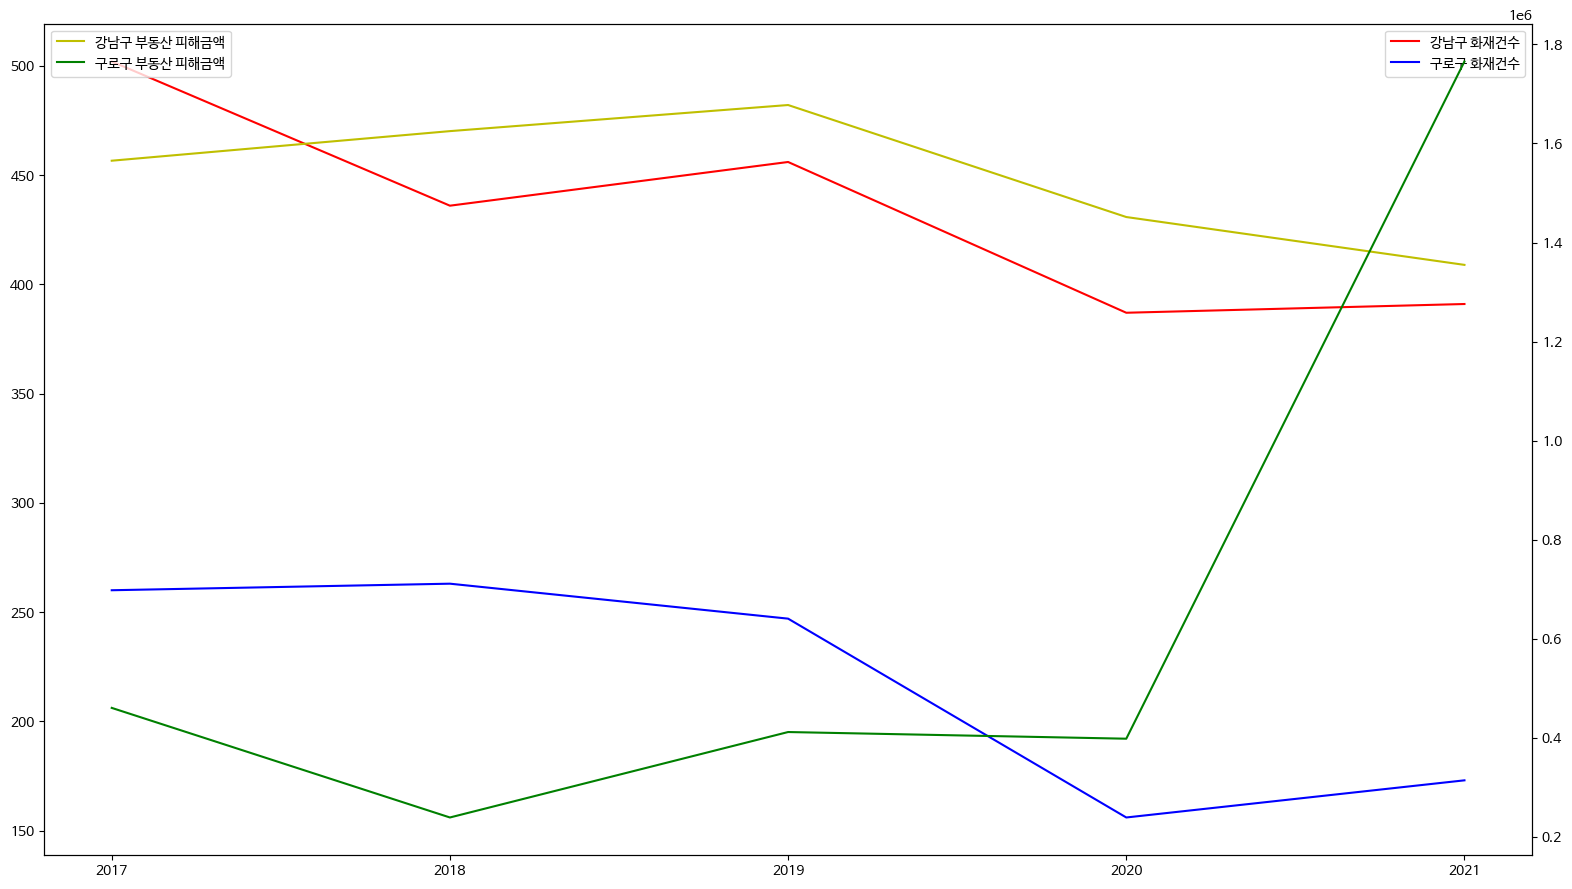

In [30]:
def fire_count(year,locate):
    df=pd.read_csv(r'data/화재발생+현황_20230710145224.csv',index_col='동별(2)')
    df.drop(columns='동별(1)',inplace=True)
    tmp=df[str(year)][str(locate)]
    return tmp

fire_count_gangnam=[]
fire_count_guro=[]
fire_price_gangnam=[]
fire_price_guro=[]

for year in range(2017,2022,1):    
    fire_count_gangnam.append(int(fire_count(year,'강남구')))
    fire_count_guro.append(int(fire_count(year,'구로구')))
    fire_price_gangnam.append(int(fire_price(year,'강남구')))
    fire_price_guro.append(int(fire_price(year,'구로구')))

fig, ax1 = plt.subplots(figsize=(width, height), dpi=dpi)
ax2 = ax1.twinx()

ax1.plot(yeardata,fire_count_gangnam,label='강남구 화재건수',color='r')
ax1.plot(yeardata,fire_count_guro,label='구로구 화재건수',color='b')

ax2.plot(yeardata,fire_price_gangnam,label='강남구 부동산 피해금액',color='y')
ax2.plot(yeardata,fire_price_guro,label='구로구 부동산 피해금액',color='g')
plt.xticks(range(min(yeardata), max(yeardata)+1, 1))

ax1.legend(loc='best')
ax2.legend(loc='best')

fig.savefig('graph/fire_total.png',bbox_inches='tight')
plt.show()

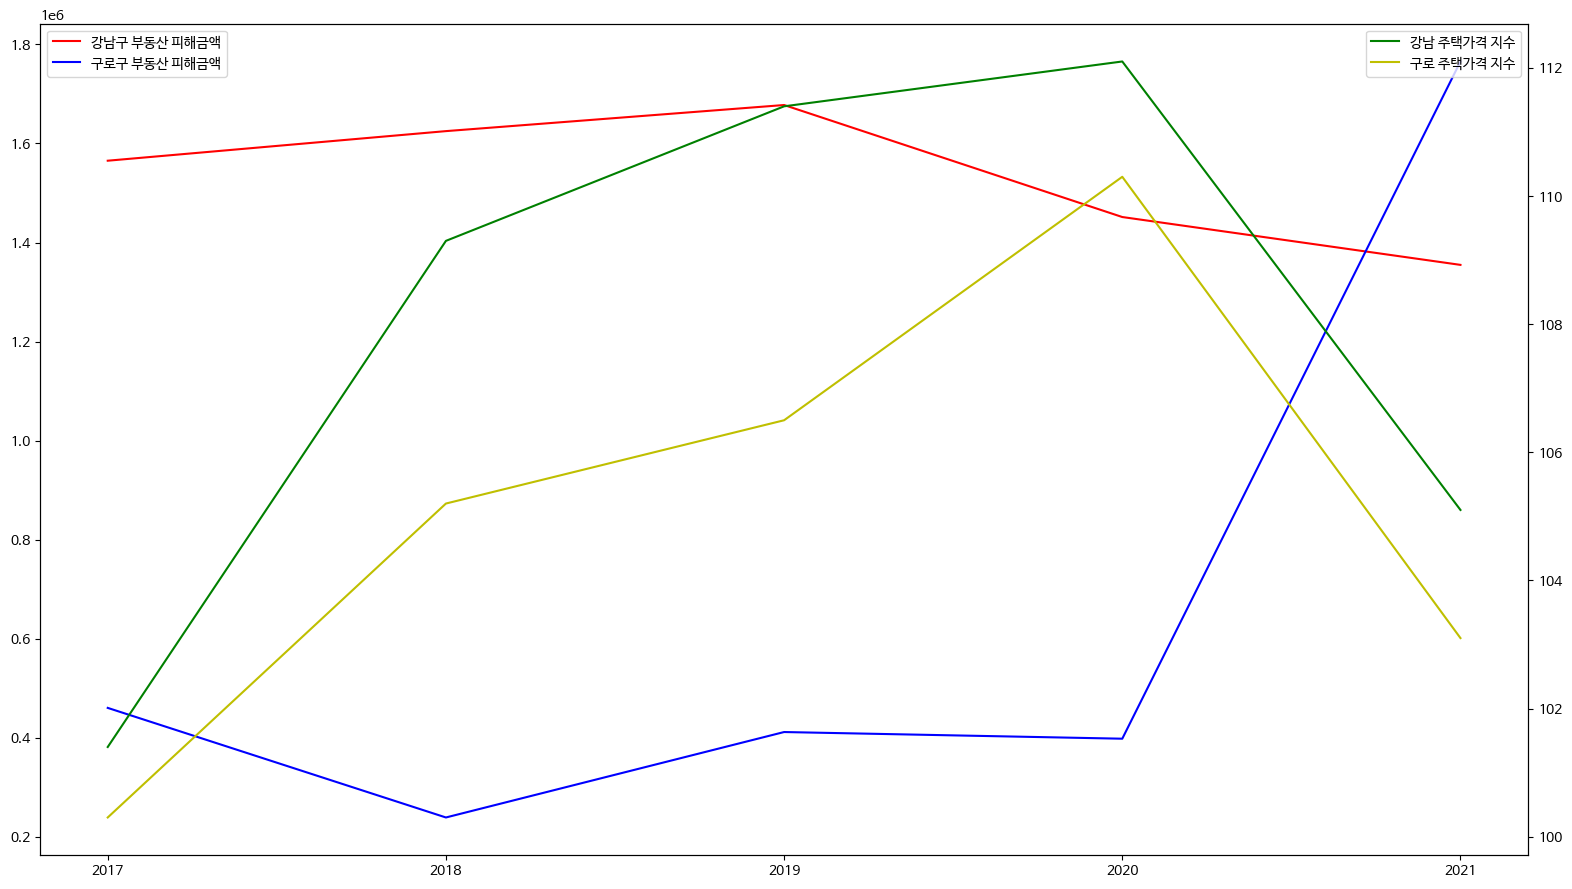

In [31]:

fig, ax1 = plt.subplots(figsize=(width, height), dpi=dpi)
ax2 = ax1.twinx()


ax1.plot(yeardata,fire_price_gangnam,label='강남구 부동산 피해금액',color='r')
ax1.plot(yeardata,fire_price_guro,label='구로구 부동산 피해금액',color='b')
ax2.plot(yeardata, gangnam_house, label='강남 주택가격 지수',color='g')
ax2.plot(yeardata, guro_house, label='구로 주택가격 지수',color='y')


plt.xticks(range(min(yeardata), max(yeardata)+1, 1))

ax1.legend(loc='best')
ax2.legend(loc='best')

fig.savefig('graph/fire_price_and_housePrice',bbox_inches='tight')
plt.show()

data/CARD_SUBWAY_MONTH_2017.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2017.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_7106/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


인덱스 0: 337119842
인덱스 0: 80804960
data/CARD_SUBWAY_MONTH_2018.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2018.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_7106/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


인덱스 0: 337119842
인덱스 1: 342170117
인덱스 0: 80804960
인덱스 1: 79255005
data/CARD_SUBWAY_MONTH_2019.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2019.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_7106/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


인덱스 0: 337119842
인덱스 1: 342170117
인덱스 2: 352932950
인덱스 0: 80804960
인덱스 1: 79255005
인덱스 2: 78652136
data/CARD_SUBWAY_MONTH_2020.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2020.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_7106/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


인덱스 0: 337119842
인덱스 1: 342170117
인덱스 2: 352932950
인덱스 3: 268894158
인덱스 0: 80804960
인덱스 1: 79255005
인덱스 2: 78652136
인덱스 3: 56751802
data/CARD_SUBWAY_MONTH_2021.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2021.csv


/tmp/ipykernel_7106/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_7106/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_7106/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


인덱스 0: 337119842
인덱스 1: 342170117
인덱스 2: 352932950
인덱스 3: 268894158
인덱스 4: 270119854
인덱스 0: 80804960
인덱스 1: 79255005
인덱스 2: 78652136
인덱스 3: 56751802
인덱스 4: 56398784


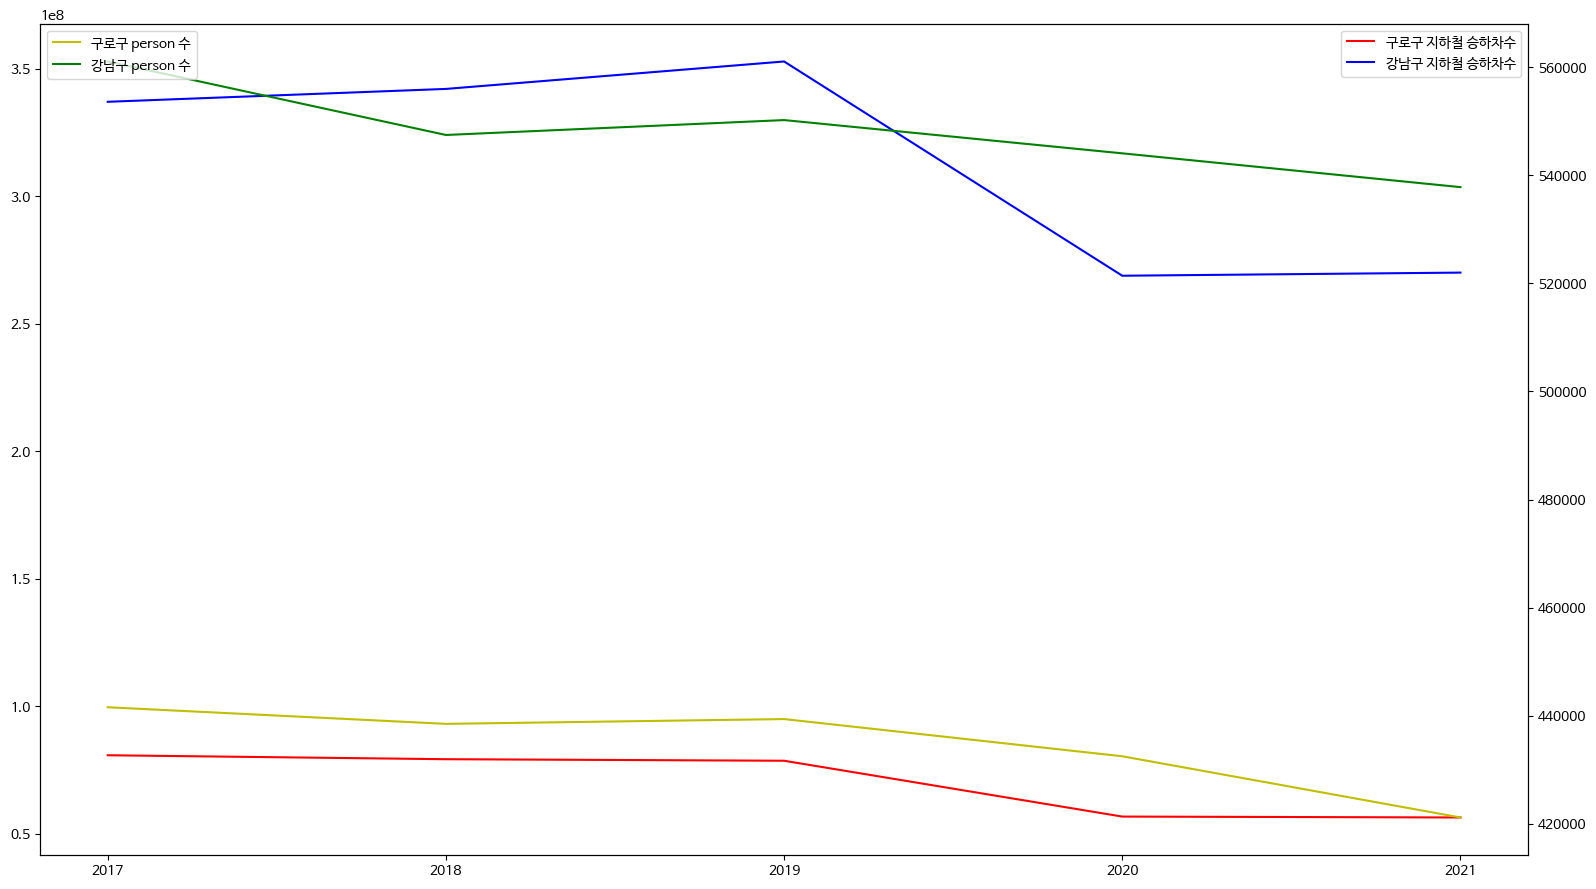

In [32]:

metro_st1 =[]
metro_st = []

def show_array_contents(array):
    for i, item in enumerate(array):
        print(f"인덱스 {i}: {item}")


def metro_tmp(tmp, array):
    array.append(tmp)
    show_array_contents(array)


for i in yeardata:
    result = metro(i, '강남구')
    result2=metro(i,'구로구')
    metro_tmp(result, metro_st1)
    metro_tmp(result2, metro_st)
    
fig, ax1 = plt.subplots(figsize=(width, height), dpi=dpi)
ax2 = ax1.twinx()

ax1.plot(yeardata,metro_st,label='구로구 지하철 승하차수',color='r')
ax1.plot(yeardata,metro_st1,label='강남구 지하철 승하차수',color='b')

ax2.plot(yeardata,guro_pop,label='구로구 person 수',color='y')
ax2.plot(yeardata,gangnampop,label='강남구 person 수',color='g')
plt.xticks(range(min(yeardata), max(yeardata)+1, 1))

ax1.legend(loc='upper right')
ax2.legend(loc='upper left')

fig.savefig('graph/jobs_and_metro.png',bbox_inches='tight')
plt.show()


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score



y=gap_df.house_gap   #분석대상:가격
x=gap_df.drop(['house_gap'],axis=1) #분석데이터: 가격외 모든것

# x=df.drop(['PRICE','B'],axis=1,inplace=False) #분석데이터: 가격,흑인외 모든것
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) #랜덤으로 156개 추출하여 사용

lr=LinearRegression()   #선형회귀분석 모델생성
lr.fit(x_train,y_train) #모델훈련
y_predict=lr.predict(x_test)    #평가데이터에 대해 예측결과 구하기

gap_df

,pop_gap,business_gap,jobs_gap,house_gap,parkinglot_gap,fire_count_gap,fire_price_gap,metro_gap
year,,,,,,,,
17-16,119493,34106,465579,1.1,-3.6,242,1104690,256314882
18-17,108967,32820,476066,4.1,-4.3,173,1385656,262915112
19-18,110838,32271,473172,4.9,-5.8,209,1265852,274280814
20-19,111567,61507,599278,1.8,-8.3,231,1053197,212142356
21-20,116637,57216,560730,2.0,-8.8,218,-410640,213721070


In [34]:
mse=mean_squared_error(y_test,y_predict) #테스트값과 예측값 차이 확인, 모델의 정확도를 알 수 있음?
rmse=np.sqrt(mse)

print('mse:{0:.3f}, rsme:{1:.3f}'.format(mse,rmse))
print('r^2(variance) : {0:.3f}'.format(r2_score(y_test,y_predict)))

mse:3.740, rsme:1.934
r^2(variance) : -0.036


In [35]:
gap_df.std()
from scipy import stats#t검정
from statsmodels.formula.api import ols,glm#회귀분석

Rformula='house_gap ~ pop_gap+business_gap+jobs_gap+parkinglot_gap+fire_count_gap+fire_price_gap+metro_gap'
regression_result=ols(Rformula,data=gap_df).fit()
regression_result.summary()

/home/kjh/.local/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/kjh/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/kjh/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/kjh/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              house_gap   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 12 Jul 2023   Prob (F-statistic):                nan
Time:                        11:42:48   Log-Likelihood:                 151.37
No. Observations:                   5   AIC:                            -292.7
Df Residuals:                       0   BIC:                            -294.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.852e-09        inf         -0        nan         nan         nan
pop_gap           -0.0003        inf         -0        nan         nan         nan
business_gap    7.428e-05        inf          0        nan         nan         nan
jobs_gap         8.67e-06        inf          0        nan         nan         nan
parkinglot_gap -1.139e-07        inf         -0        nan         nan         nan
fire_count_gap  1.235e-06        inf          0        nan         nan         nan
fire_price_gap -1.359e-06        inf         -0        nan         nan         nan
metro_gap       1.041e-07        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.095
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.475
Skew:                           0.521   Prob(JB):                        0.789
Kurtosis:                       1.907   Cond. No.                     5.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The condition number is large, 5.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""